In [1]:
import pandas as pd
import re

In [2]:
D_2009 = pd.read_csv("2009.csv",nrows=500000)
D_2010 = pd.read_csv("2010.csv",nrows=500000)
D_2011 = pd.read_csv("2011.csv",nrows=500000)
D_2012 = pd.read_csv("2012.csv",nrows=500000)
D_2013 = pd.read_csv("2013.csv",nrows=500000)
D_2014 = pd.read_csv("2014.csv",nrows=500000)
D_2015 = pd.read_csv("2015.csv",nrows=500000)
D_2016 = pd.read_csv("2016.csv",nrows=500000)
D_2017 = pd.read_csv("2017.csv",nrows=500000)
D_2018 = pd.read_csv("2018.csv",nrows=500000)
D_2019 = pd.read_csv("2019.csv",nrows=500000)
D_2020 = pd.read_csv("2020.csv",nrows=500000)
D_2021 = pd.read_csv("2021.csv",nrows=500000)


/raid/omer_david/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28,55,60,61,62,63,64,65,66,67,68,69,70,71,77,78,79,80,83,84,85,86,87,88,89,90,91,92,93,99,104,105,106,107,108,109,111,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,158,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/raid/omer_david/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28,53,58,59,60,61,62,63,64,65,66,67,68,69,75,76,77,78,79,80,81,82,83,86,87,88,89,90,91,92,93,94,95,96,102,107,108,109,110,111,112,114,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,161,162,163) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/raid/omer_david/lib/python3.6/site-packages/IPython/core/interactiveshell.py:30

In [3]:

# create a dictionary of DataFrames
dfs = {
    'D_2009': D_2009,
    'D_2010': D_2010,
    'D_2011': D_2011,
    'D_2012': D_2012,
    'D_2013': D_2013,
    'D_2014': D_2014,
    'D_2015': D_2015,
    'D_2016': D_2016,
    'D_2017': D_2017,
    'D_2018': D_2018,
    'D_2019': D_2019,
    'D_2020': D_2020,
    'D_2021': D_2021
}

# iterate over each DataFrame and print the number of columns
for name, df in dfs.items():
    num_cols = df.shape[1]
    print(f"{name} has {num_cols} columns.")


D_2009 has 269 columns.
D_2010 has 269 columns.
D_2011 has 280 columns.
D_2012 has 280 columns.
D_2013 has 280 columns.
D_2014 has 241 columns.
D_2015 has 240 columns.
D_2016 has 240 columns.
D_2017 has 240 columns.
D_2018 has 241 columns.
D_2019 has 226 columns.
D_2020 has 225 columns.
D_2021 has 225 columns.


In [4]:
column_names = [set(df.columns) for df in dfs.values()]

# find common columns
common_columns = set.intersection(*column_names)

# print common columns
print(common_columns)

{'tbo_rec', 'bfacil', 'f_rf_ncesar', 'f_rf_pdiab', 'sex', 'ld_augm', 'lbo_rec', 'rdmeth_rec', 'apgar5r', 'f_tobaco', 'f_ab_seiz', 'cig_rec', 'dlmp_yy', 'ab_nicu', 'ilp_r11', 'f_ob_fail', 'ab_seiz', 'priorterm', 'f_cigs_1', 'f_ob_succ', 'f_ca_downs', 'f_cigs_2', 'bfed', 'f_ab_surfac', 'mager', 'rf_ppterm', 'ilop_r11', 'dob_mm', 'm_ht_in', 'ca_cdh', 'ab_surf', 'mage_impflg', 'fracehisp', 'f_wtgain', 'ca_disor', 'f_dwgt', 'dob_tt', 'cig_3', 'ilive', 'f_tpcv', 'bwtr12', 'ld_anes', 'itran', 'f_rf_gdiab', 'apgar5', 'f_ca_ompha', 'ca_cleft', 'cig_2', 'cig_1', 'dplural', 'ca_hypo', 'obgest_flg', 'imp_sex', 'mraceimp', 'ca_cchd', 'fagerpt_flg', 'f_rf_cesar', 'mar_imp', 'ld_indl', 'f_mar_p', 'dwgt_r', 'precare', 'f_ca_menin', 'apgar10', 'f_ca_cleft', 'illb_r', 'fagecomb', 'f_cigs_0', 'bmi', 'gestrec10', 'mm_plac', 'f_ca_heart', 'fagerec11', 'f_wic', 'previs_rec', 'meduc', 'ab_anti', 'pwgt_r', 'restatus', 'f_pay', 'f_cigs_3', 'f_rf_ghyper', 'dob_wk', 'gestrec3', 'mracehisp', 'ilop_r', 'dmeth_rec'

In [5]:
len(common_columns)

154

In [6]:
df_c = pd.concat([df.loc[:, common_columns] for df in dfs.values()])

C:\Users\User\AppData\Local\Temp\ipykernel_19744\64086011.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_c = pd.concat([df.loc[:, common_columns] for df in dfs.values()])
C:\Users\User\AppData\Local\Temp\ipykernel_19744\64086011.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_c = pd.concat([df.loc[:, common_columns] for df in dfs.values()])
C:\Users\User\AppData\Local\Temp\ipykernel_19744\64086011.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_c = pd.concat([df.loc[:, common_columns] for df in dfs.values()])
C:\Users\User\AppData\Local\Temp\ipykernel_19744\64086011.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_c = pd.concat([df.loc[:, common_columns] for df in dfs.values()])
C:\Users

In [7]:
df_c

,tbo_rec,bfacil,f_rf_ncesar,f_rf_pdiab,sex,ld_augm,lbo_rec,rdmeth_rec,apgar5r,f_tobaco,...,f_ca_limb,mtran,f_ab_vent6,f_facility,f_ca_gastro,ca_gast,f_apgar5,f_ab_nicu,rf_artec,ca_mnsb
0,2,NaN,0,0,M,NaN,2,NaN,1,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
1,2,NaN,0,0,M,NaN,2,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
2,2,NaN,0,0,F,NaN,2,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
3,3,NaN,0,0,M,NaN,3,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
4,3,NaN,0,0,F,NaN,3,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1,1.0,1,1,M,Y,1,1.0,4,1,...,1,N,1,1,1,N,1,1,X,N
499996,3,1.0,1,1,F,N,3,1.0,4,1,...,1,N,1,1,1,N,1,1,X,N
499997,3,1.0,1,1,F,N,3,4.0,4,1,...,1,N,1,1,1,N,1,1,X,N
499998,2,1.0,1,1,F,Y,2,1.0,4,1,...,1,N,1,1,1,N,1,1,X,N


In [8]:
if "apgar10" in df_c.columns:
    print("exist")

exist


df_c = df_concatenated - data from 2009 to 2021 with 154 common columns

starting cleaning the data

In [9]:
#Removing spaces and replacing with _
df_c.columns = [c.replace(' ', '_') for c in df_c]

In [10]:
df_c.info()
df_c.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500000 entries, 0 to 499999
Columns: 154 entries, tbo_rec to ca_mnsb
dtypes: float64(37), int64(77), object(40)
memory usage: 7.5+ GB


,tbo_rec,bfacil,f_rf_ncesar,f_rf_pdiab,sex,ld_augm,lbo_rec,rdmeth_rec,apgar5r,f_tobaco,...,f_ca_limb,mtran,f_ab_vent6,f_facility,f_ca_gastro,ca_gast,f_apgar5,f_ab_nicu,rf_artec,ca_mnsb
0,2,NaN,0,0,M,NaN,2,NaN,1,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
1,2,NaN,0,0,M,NaN,2,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
2,2,NaN,0,0,F,NaN,2,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
3,3,NaN,0,0,M,NaN,3,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN
4,3,NaN,0,0,F,NaN,3,NaN,4,0,...,0,NaN,0,0,0,NaN,1,0,NaN,NaN


In [11]:
from IPython.display import display

pd.options.display.max_columns = None
display(df_c)

,tbo_rec,bfacil,f_rf_ncesar,f_rf_pdiab,sex,ld_augm,lbo_rec,rdmeth_rec,apgar5r,f_tobaco,f_ab_seiz,cig_rec,dlmp_yy,ab_nicu,ilp_r11,f_ob_fail,ab_seiz,priorterm,f_cigs_1,f_ob_succ,f_ca_downs,f_cigs_2,bfed,f_ab_surfac,mager,rf_ppterm,ilop_r11,dob_mm,m_ht_in,ca_cdh,ab_surf,mage_impflg,fracehisp,f_wtgain,ca_disor,f_dwgt,dob_tt,cig_3,ilive,f_tpcv,bwtr12,ld_anes,itran,f_rf_gdiab,apgar5,f_ca_ompha,ca_cleft,cig_2,cig_1,dplural,ca_hypo,obgest_flg,imp_sex,mraceimp,ca_cchd,fagerpt_flg,f_rf_cesar,mar_imp,ld_indl,f_mar_p,dwgt_r,precare,f_ca_menin,apgar10,f_ca_cleft,illb_r,fagecomb,f_cigs_0,bmi,gestrec10,mm_plac,f_ca_heart,fagerec11,f_wic,previs_rec,meduc,ab_anti,pwgt_r,restatus,f_pay,f_cigs_3,f_rf_ghyper,dob_wk,gestrec3,mracehisp,ilop_r,dmeth_rec,ld_ster,f_pwgt,dob_yy,wtgain,mager9,me_trial,ab_aven6,setorder_r,f_rf_ppb,rf_fedrg,apgar10r,mm_uhyst,combgest,bmi_r,rf_cesarn,mar_p,f_bfed,mager14,pay_rec,bfacil3,ld_chor,rf_cesar,bwtr4,dbwt,wic,f_ca_chrom,pay,f_m_ht,f_pay_rec,f_mpcb,ca_omph,me_rout,ab_aven1,ca_clpal,illb_r11,f_meduc,f_rf_phyper,f_ab_antibio,ca_limb,mm_mtr,wtgain_rec,imp_plur,f_ca_hypos,f_ca_cleftlp,f_rf_eclamp,f_ca_hernia,feduc,mm_rupt,ca_anen,f_ca_anen,mage_repflg,rf_inftr,attend,dlmp_mm,me_pres,cig_0,f_ab_vent,f_ca_limb,mtran,f_ab_vent6,f_facility,f_ca_gastro,ca_gast,f_apgar5,f_ab_nicu,rf_artec,ca_mnsb
0,2,NaN,0,0,M,NaN,2,NaN,1,0,0,NaN,2008,NaN,NaN,0,NaN,0,0,0,0,0,NaN,0,31,NaN,NaN,1,NaN,NaN,NaN,NaN,6,1,NaN,0,NaN,NaN,NaN,1,2,NaN,NaN,0,1,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3,NaN,0,8,0,6,NaN,NaN,NaN,1,0,0,0,6,1,6,NaN,1,NaN,0,2009,10,5,NaN,NaN,NaN,0,NaN,NaN,NaN,28,NaN,NaN,NaN,0,10,NaN,1,NaN,NaN,1,680,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,NaN,NaN,0,0,NaN,0,0,0,NaN,1,0,NaN,NaN
1,2,NaN,0,0,M,NaN,2,NaN,4,0,0,NaN,2008,NaN,NaN,0,NaN,0,0,0,0,0,NaN,0,24,NaN,NaN,3,NaN,NaN,NaN,NaN,6,1,NaN,0,NaN,NaN,NaN,1,8,NaN,NaN,0,9,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,6,NaN,0,4,0,10,NaN,NaN,NaN,2,0,0,0,5,2,6,NaN,2,NaN,0,2009,17,3,NaN,NaN,NaN,0,NaN,NaN,NaN,38,NaN,NaN,NaN,0,8,NaN,1,NaN,NaN,3,3544,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,NaN,NaN,0,0,NaN,0,0,0,NaN,1,0,NaN,NaN
2,2,NaN,0,0,F,NaN,2,NaN,4,0,0,NaN,2008,NaN,NaN,0,NaN,0,0,0,0,0,NaN,0,22,NaN,NaN,3,NaN,NaN,NaN,NaN,6,1,NaN,0,NaN,NaN,NaN,1,7,NaN,NaN,0,9,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,7,NaN,0,4,0,8,NaN,NaN,NaN,2,0,0,0,5,2,6,NaN,1,NaN,0,2009,46,3,NaN,NaN,NaN,0,NaN,NaN,NaN,39,NaN,NaN,NaN,0,8,NaN,1,NaN,NaN,3,3175,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,5,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,NaN,NaN,0,0,NaN,0,0,0,NaN,1,0,NaN,NaN
3,3,NaN,0,0,M,NaN,3,NaN,4,0,0,NaN,2008,NaN,NaN,0,NaN,0,0,0,0,0,NaN,0,28,NaN,NaN,3,NaN,NaN,NaN,NaN,6,1,NaN,0,NaN,NaN,NaN,1,6,NaN,NaN,0,9,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,6,NaN,0,4,0,10,NaN,NaN,NaN,1,0,0,0,5,2,6,NaN,2,NaN,0,2009,5,4,NaN,NaN,NaN,0,NaN,NaN,NaN,38,NaN,NaN,NaN,0,9,NaN,1,NaN,NaN,3,2750,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,1,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,NaN,NaN,0,0,NaN,0,0,0,NaN,1,0,NaN,NaN
4,3,NaN,0,0,F,NaN,3,NaN,4,0,0,NaN,2008,NaN,NaN,0,NaN,0,0,0,0,0,NaN,0,23,NaN,NaN,3,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,NaN,1,7,NaN,NaN,0,9,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,8,NaN,0,3,0,7,NaN,NaN,NaN,2,0,0,0,3,2,1,NaN,1,NaN,0,2009,19,3,NaN,NaN,NaN,0,NaN,NaN,NaN,40,NaN,NaN,NaN,0,8,NaN,1,NaN,NaN,3,3033,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,NaN,NaN,0,0,NaN,0,0,0,NaN,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [12]:
df_c.duplicated().sum()

45

In [13]:
missing = df_c.isnull()
print(missing.sum())

tbo_rec             0
bfacil         966183
f_rf_ncesar         0
f_rf_pdiab          0
sex                 0
                ...  
ca_gast        966183
f_apgar5            0
f_ab_nicu           0
rf_artec       966183
ca_mnsb        966183
Length: 154, dtype: int64


In [14]:
sum = missing.sum()
for key,value in sum.iteritems():
     if value != 0:
        print(key,",",value)

bfacil , 966183
ld_augm , 966183
rdmeth_rec , 966183
cig_rec , 966183
ab_nicu , 966183
ilp_r11 , 966183
ab_seiz , 966183
bfed , 966183
rf_ppterm , 966183
ilop_r11 , 966183
m_ht_in , 966183
ca_cdh , 966183
ab_surf , 966183
mage_impflg , 6498639
ca_disor , 966183
dob_tt , 966183
cig_3 , 966183
ilive , 966183
ld_anes , 966183
itran , 966183
ca_cleft , 966183
cig_2 , 966183
cig_1 , 966183
ca_hypo , 966183
obgest_flg , 6332171
imp_sex , 6499903
mraceimp , 6180094
ca_cchd , 966183
fagerpt_flg , 6497821
mar_imp , 6497595
ld_indl , 966183
dwgt_r , 966183
precare , 966183
apgar10 , 966183
illb_r , 966183
fagecomb , 966183
bmi , 966183
mm_plac , 966183
meduc , 966183
ab_anti , 966183
pwgt_r , 966183
ilop_r , 966183
ld_ster , 966183
me_trial , 966183
ab_aven6 , 966183
setorder_r , 966183
rf_fedrg , 966183
apgar10r , 966183
mm_uhyst , 966183
bmi_r , 966183
rf_cesarn , 966183
mar_p , 2555625
pay_rec , 966183
ld_chor , 966183
rf_cesar , 966183
wic , 966183
pay , 966183
ca_omph , 966183
me_rout , 966

C:\Users\User\AppData\Local\Temp\ipykernel_19744\399302087.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in sum.iteritems():


In [15]:
# Replacing all empty strings(only dashes) to NAN 
df_c.replace(r'^\s*$', pd.np.nan, regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19744\3487984925.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_c.replace(r'^\s*$', pd.np.nan, regex=True, inplace=True)


In [16]:
# finding every categorial culomn

cat_list = []
str_vals = ['Y','y','N','n','U','u','X','x']
for col in df_c:   
    if any(value in df_c[col].unique() for value in str_vals):
        cat_list.append(col)
cat_list

C:\Users\User\AppData\Local\Temp\ipykernel_19744\1446225412.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if any(value in df_c[col].unique() for value in str_vals):


['ld_augm',
 'cig_rec',
 'ab_nicu',
 'ab_seiz',
 'bfed',
 'rf_ppterm',
 'ca_cdh',
 'ab_surf',
 'ca_disor',
 'ilive',
 'ld_anes',
 'itran',
 'ca_cleft',
 'ca_hypo',
 'ca_cchd',
 'ld_indl',
 'mm_plac',
 'ab_anti',
 'ld_ster',
 'me_trial',
 'ab_aven6',
 'rf_fedrg',
 'mm_uhyst',
 'mar_p',
 'ld_chor',
 'rf_cesar',
 'wic',
 'ca_omph',
 'ab_aven1',
 'ca_clpal',
 'ca_limb',
 'mm_mtr',
 'mm_rupt',
 'ca_anen',
 'rf_inftr',
 'mtran',
 'ca_gast',
 'rf_artec',
 'ca_mnsb']

In [17]:
# replacing categorial values with numeric vals.
for col in df_c:
    if col in cat_list:
       df_c[col].replace({'Y':1, 'y':1,'N':0, 'n':0,'X':None, 'x':None,'U':None, 'u':None}, inplace=True)


In [18]:
df = df_c
# Calculate the percentage of NaN values in each row
nan_rows = df.isnull().sum(axis=1) / df.shape[1]

# Calculate the percentage of NaN values in each column
nan_cols = df.isnull().sum(axis=0) / df.shape[0]
for key,value in nan_cols.iteritems():
  # if value != 0:
      print(key,",",value)
for key,value in nan_rows.iteritems():
  # if value != 0:
      print(key,",",value)

MemoryError: Unable to allocate 955. MiB for an array with shape (154, 6500000) and data type bool

In [26]:
numOfcollsDroped = 0
for key,value in nan_cols.iteritems():
  if value >= 0.3:# if there are more than 30% of NANS DROP COL
    df_c.drop(key, inplace=True, axis=1)
    numOfcollsDroped += 1
    print(key, " was droped")
print("Number of columns droped: ",numOfcollsDroped)

C:\Users\User\AppData\Local\Temp\ipykernel_9696\583637892.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in nan_cols.iteritems():


bmi_r  was droped
rf_cesar  was droped
pwgt_r  was droped
illb_r  was droped
ab_aven1  was droped
rf_ppterm  was droped
bfacil  was droped
ab_seiz  was droped
ca_cdh  was droped
pay_rec  was droped
ca_limb  was droped
rf_cesarn  was droped
setorder_r  was droped
rf_inftr  was droped
ca_cchd  was droped
ab_aven6  was droped
meduc  was droped
fagecomb  was droped
precare  was droped
cig_1  was droped
ca_omph  was droped
ilop_r11  was droped
ca_gast  was droped
apgar10r  was droped
m_ht_in  was droped
ld_indl  was droped
ld_anes  was droped
mm_plac  was droped
dob_tt  was droped
rdmeth_rec  was droped
feduc  was droped
ilop_r  was droped
mm_uhyst  was droped
me_rout  was droped
ca_cleft  was droped
ca_disor  was droped
bmi  was droped
mm_mtr  was droped
cig_rec  was droped
ab_surf  was droped
ilive  was droped
wic  was droped
cig_0  was droped
ilp_r11  was droped
mtran  was droped
ca_clpal  was droped
ab_anti  was droped
dwgt_r  was droped
apgar10  was droped
ca_mnsb  was droped
ab_nicu  

In [27]:
len(df_c.index)

1298999

In [28]:
df = df_c
# Calculate the percentage of NaN values in each row
nan_rows = df.isnull().sum(axis=1) / df.shape[1]

numOfRowsDroped = 0
for key,value in nan_rows.iteritems():
  if value >= 0.4:# if there are more than 40% of NANS DROP COL
    df_c.drop(index= key, inplace=True)
    numOfRowsDroped += 1
    print(key, " was droped")
print("Number of Rows droped: ",numOfRowsDroped)
print(len(df_c.index))


C:\Users\User\AppData\Local\Temp\ipykernel_9696\1914297450.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in nan_rows.iteritems():


Number of Rows droped:  0
1298999


In [29]:
#droping colls with fillers string in the name
df_c.drop(df_c.filter(regex='Filler').columns,inplace=True, axis=1)

In [30]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298999 entries, 77 to 99999
Data columns (total 78 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   mager14       1298999 non-null  int64 
 1   dmeth_rec     1298999 non-null  int64 
 2   f_ca_chrom    1298999 non-null  int64 
 3   f_ca_downs    1298999 non-null  int64 
 4   bwtr4         1298999 non-null  int64 
 5   f_wic         1298999 non-null  int64 
 6   mager         1298999 non-null  int64 
 7   f_ca_anen     1298999 non-null  int64 
 8   gestrec3      1298999 non-null  int64 
 9   f_bfed        1298999 non-null  int64 
 10  f_facility    1298999 non-null  int64 
 11  f_ca_cleftlp  1298999 non-null  int64 
 12  attend        1298999 non-null  int64 
 13  f_apgar5      1298999 non-null  int64 
 14  f_rf_phyper   1298999 non-null  int64 
 15  f_ca_menin    1298999 non-null  int64 
 16  previs_rec    1298999 non-null  int64 
 17  dplural       1298999 non-null  int64 
 18  fag

In [31]:
df_c

,mager14,dmeth_rec,f_ca_chrom,f_ca_downs,bwtr4,f_wic,mager,f_ca_anen,gestrec3,f_bfed,f_facility,f_ca_cleftlp,attend,f_apgar5,f_rf_phyper,f_ca_menin,previs_rec,dplural,fagerec11,f_ca_gastro,f_ca_cleft,f_ca_heart,dob_yy,f_rf_gdiab,f_rf_ghyper,tbo_rec,fracehisp,mager9,dlmp_yy,f_rf_cesar,f_rf_pdiab,restatus,f_ab_seiz,f_pwgt,f_mpcb,f_ca_ompha,dob_mm,f_tpcv,f_rf_ncesar,bfacil3,combgest,f_mar_p,f_cigs_2,apgar5r,wtgain_rec,f_cigs_3,f_rf_ppb,f_ca_hypos,f_ab_surfac,f_ca_limb,f_wtgain,mracehisp,f_m_ht,f_ca_hernia,bwtr12,f_meduc,wtgain,f_cigs_0,f_dwgt,f_rf_eclamp,lbo_rec,f_ob_fail,f_ab_vent6,apgar5,f_pay,gestrec10,dbwt,f_ab_vent,f_ab_antibio,f_ab_nicu,dob_wk,f_tobaco,f_ob_succ,priorterm,dlmp_mm,f_pay_rec,sex,f_cigs_1
77,9,1,0,0,3,0,29,0,2,0,0,0,1,1,0,0,7,1,6,0,0,0,2009,0,0,5,1,4,2008,0,0,1,0,0,0,0,2,1,0,1,38,0,0,4,3,0,0,0,0,0,1,1,0,0,6,0,23,0,0,0,4,0,0,9,0,6,2693,0,0,0,7,0,0,1,6,0,M,0
78,11,1,0,0,3,0,38,0,2,0,0,0,1,1,0,0,7,1,7,0,0,0,2009,0,0,4,6,6,2008,0,0,2,0,0,0,0,2,1,0,1,39,0,0,4,2,0,0,0,0,0,1,6,0,0,7,0,16,0,0,0,3,0,0,10,0,7,3402,0,0,0,4,0,0,1,5,0,F,0
79,10,2,0,0,3,0,30,0,2,0,0,0,1,1,0,0,6,1,5,0,0,0,2009,0,0,6,6,5,2008,0,0,2,0,0,0,0,2,1,0,1,44,0,0,4,3,0,0,0,0,0,1,6,0,0,8,0,30,0,0,0,6,0,0,9,0,10,3657,0,0,0,5,0,0,0,4,0,M,0
80,10,2,0,0,3,0,33,0,2,0,0,0,1,1,0,0,6,1,7,0,0,0,2009,0,0,1,6,5,2008,0,0,2,0,0,0,0,2,1,0,1,38,0,0,4,3,0,0,0,0,0,1,6,0,0,8,0,28,0,0,0,1,0,0,9,0,6,3799,0,0,0,4,0,0,0,6,0,M,0
81,10,1,0,0,3,0,30,0,2,0,0,0,1,1,0,0,6,1,4,0,0,0,2009,0,0,1,6,5,2008,0,0,1,0,0,0,0,2,1,0,1,40,0,0,4,3,0,0,0,0,0,1,6,0,0,6,0,30,0,0,0,1,0,0,9,0,8,2665,0,0,0,5,0,0,0,5,0,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,1,1,1,3,1,19,1,2,1,1,1,1,1,1,1,8,1,3,1,1,1,2021,1,1,1,7,2,2021,1,1,2,1,1,1,1,12,1,1,1,42,1,1,4,2,1,1,1,1,1,1,1,1,1,9,1,20,1,1,1,1,1,1,9,0,10,4034,1,1,1,1,1,1,0,3,1,M,1
99996,11,2,1,1,3,1,39,1,1,1,1,1,1,1,1,1,5,1,5,1,1,1,2021,1,1,3,1,6,9999,1,1,1,1,1,1,1,12,1,1,1,36,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,0,1,1,1,3,1,1,3,0,5,2920,1,1,1,5,1,1,0,99,1,M,1
99997,9,1,1,1,3,1,25,1,2,1,1,1,1,1,1,1,7,1,4,1,1,1,2021,1,1,7,1,4,2021,1,1,2,1,1,1,1,12,1,1,1,39,1,1,4,2,1,1,1,1,1,1,1,1,1,6,1,19,1,1,1,7,1,1,10,0,7,2875,1,1,1,2,1,1,0,3,1,M,1
99998,8,1,1,1,3,1,20,1,2,1,1,1,1,1,1,1,7,1,3,1,1,1,2021,1,1,1,1,3,2021,1,1,2,1,1,1,1,12,1,1,1,38,1,1,3,1,1,1,1,1,1,1,1,1,1,8,1,0,1,1,1,1,1,1,8,0,6,3735,1,1,1,3,1,1,0,3,1,F,1


Naive feature selection:
searching for cols with one value

In [32]:
unique_vals = df_c.nunique()
for items in unique_vals.iteritems():
    if items[1] == 1:
        print(items)

C:\Users\User\AppData\Local\Temp\ipykernel_9696\2592551350.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in unique_vals.iteritems():


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#print lists of all unique values in the columns
#variable verifies if the value -1 is in any cell
is_minusOne = []
df_uni_vals = {}
for col in df_c.columns:
    unique_values = df_c[col].unique()
    df_uni_vals[col] = unique_values
    if -1 in unique_values:
        is_minusOne.append(col)
    unique_values_str = ", ".join(str(value) for value in unique_values)
    print(f"Unique values in '{col}': {unique_values_str}")

# Define the NumPy array as a string
for key, value in df_uni_vals.items():
    # Iterate over the elements and check for non-digits
    for element in value:
        if not np.char.isdigit(str(element)):
            print(key, f"Element '{element}' contains non-digit characters")

for key, value in df_uni_vals.items():
    print(key, ' : ', value)
# Define the NumPy array as a string
for key, value in df_uni_vals.items():
    # Iterate over the elements and check for non-digits
    for element in value:
        if not np.char.isdigit(str(element)):
            print(key, f"Element '{element}' contains non-digit characters")


Unique values in 'mager14': 9, 11, 10, 6, 8, 7, 12, 4, 5, 1, 14, 3, 13
Unique values in 'dmeth_rec': 1, 2, 9
Unique values in 'f_ca_chrom': 0, 1
Unique values in 'f_ca_downs': 0, 1
Unique values in 'bwtr4': 3, 2, 1, 4
Unique values in 'f_wic': 0, 1
Unique values in 'mager': 29, 38, 30, 33, 18, 24, 19, 22, 28, 20, 26, 32, 21, 23, 42, 27, 25, 16, 17, 35, 31, 34, 14, 40, 39, 37, 50, 41, 36, 44, 15, 43, 45, 46, 47, 13, 48, 49, 12
Unique values in 'f_ca_anen': 0, 1
Unique values in 'gestrec3': 2, 1, 3
Unique values in 'f_bfed': 0, 1
Unique values in 'f_facility': 0, 1
Unique values in 'f_ca_cleftlp': 0, 1
Unique values in 'attend': 1, 3, 2, 5, 4, 9
Unique values in 'f_apgar5': 1, 0
Unique values in 'f_rf_phyper': 0, 1
Unique values in 'f_ca_menin': 0, 1
Unique values in 'previs_rec': 7, 6, 4, 9, 8, 11, 5, 2, 1, 10, 3, 12
Unique values in 'dplural': 1, 2, 3, 5, 4
Unique values in 'fagerec11': 6, 7, 5, 4, 3, 2, 11, 8, 9, 10, 1
Unique values in 'f_ca_gastro': 0, 1
Unique values in 'f_ca_cleft'

In [35]:
#replacing all C (confirmed) values to 1 & all P values (pending) to -1 in 2 columns
df_c['sex'] = df_c['sex'].replace('F', 1)
df_c['sex'] = df_c['sex'].replace('M', 0)

In [36]:
print(is_minusOne) # 

[]


In [38]:
df_c = df_c.fillna(-1)
#now every nan value is replaced with -1

In [ ]:
# #NOT WORKING
# #replacing all C (confirmed) values to 1 & all P values (pending) to -1 in 2 columns
# df_c['ca_downs'] = df_c['ca_downs'].replace('C', 1)
# df_c['ca_downs'] = df_c['ca_downs'].replace('P', -1)
# df_c['ca_disor'] = df_c['ca_disor'].replace('C', 1)
# df_c['ca_disor'] = df_c['ca_disor'].replace('P', -1)

In [42]:
for col in df_c.columns:
    if df_c[col].dtype == 'object':
        df_c[col] = pd.to_numeric(df_c[col])

In [43]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298999 entries, 77 to 99999
Data columns (total 78 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   mager14       1298999 non-null  int64
 1   dmeth_rec     1298999 non-null  int64
 2   f_ca_chrom    1298999 non-null  int64
 3   f_ca_downs    1298999 non-null  int64
 4   bwtr4         1298999 non-null  int64
 5   f_wic         1298999 non-null  int64
 6   mager         1298999 non-null  int64
 7   f_ca_anen     1298999 non-null  int64
 8   gestrec3      1298999 non-null  int64
 9   f_bfed        1298999 non-null  int64
 10  f_facility    1298999 non-null  int64
 11  f_ca_cleftlp  1298999 non-null  int64
 12  attend        1298999 non-null  int64
 13  f_apgar5      1298999 non-null  int64
 14  f_rf_phyper   1298999 non-null  int64
 15  f_ca_menin    1298999 non-null  int64
 16  previs_rec    1298999 non-null  int64
 17  dplural       1298999 non-null  int64
 18  fagerec11     1298999 n

Heat Map

In [44]:
corr_df = df_c.corr()

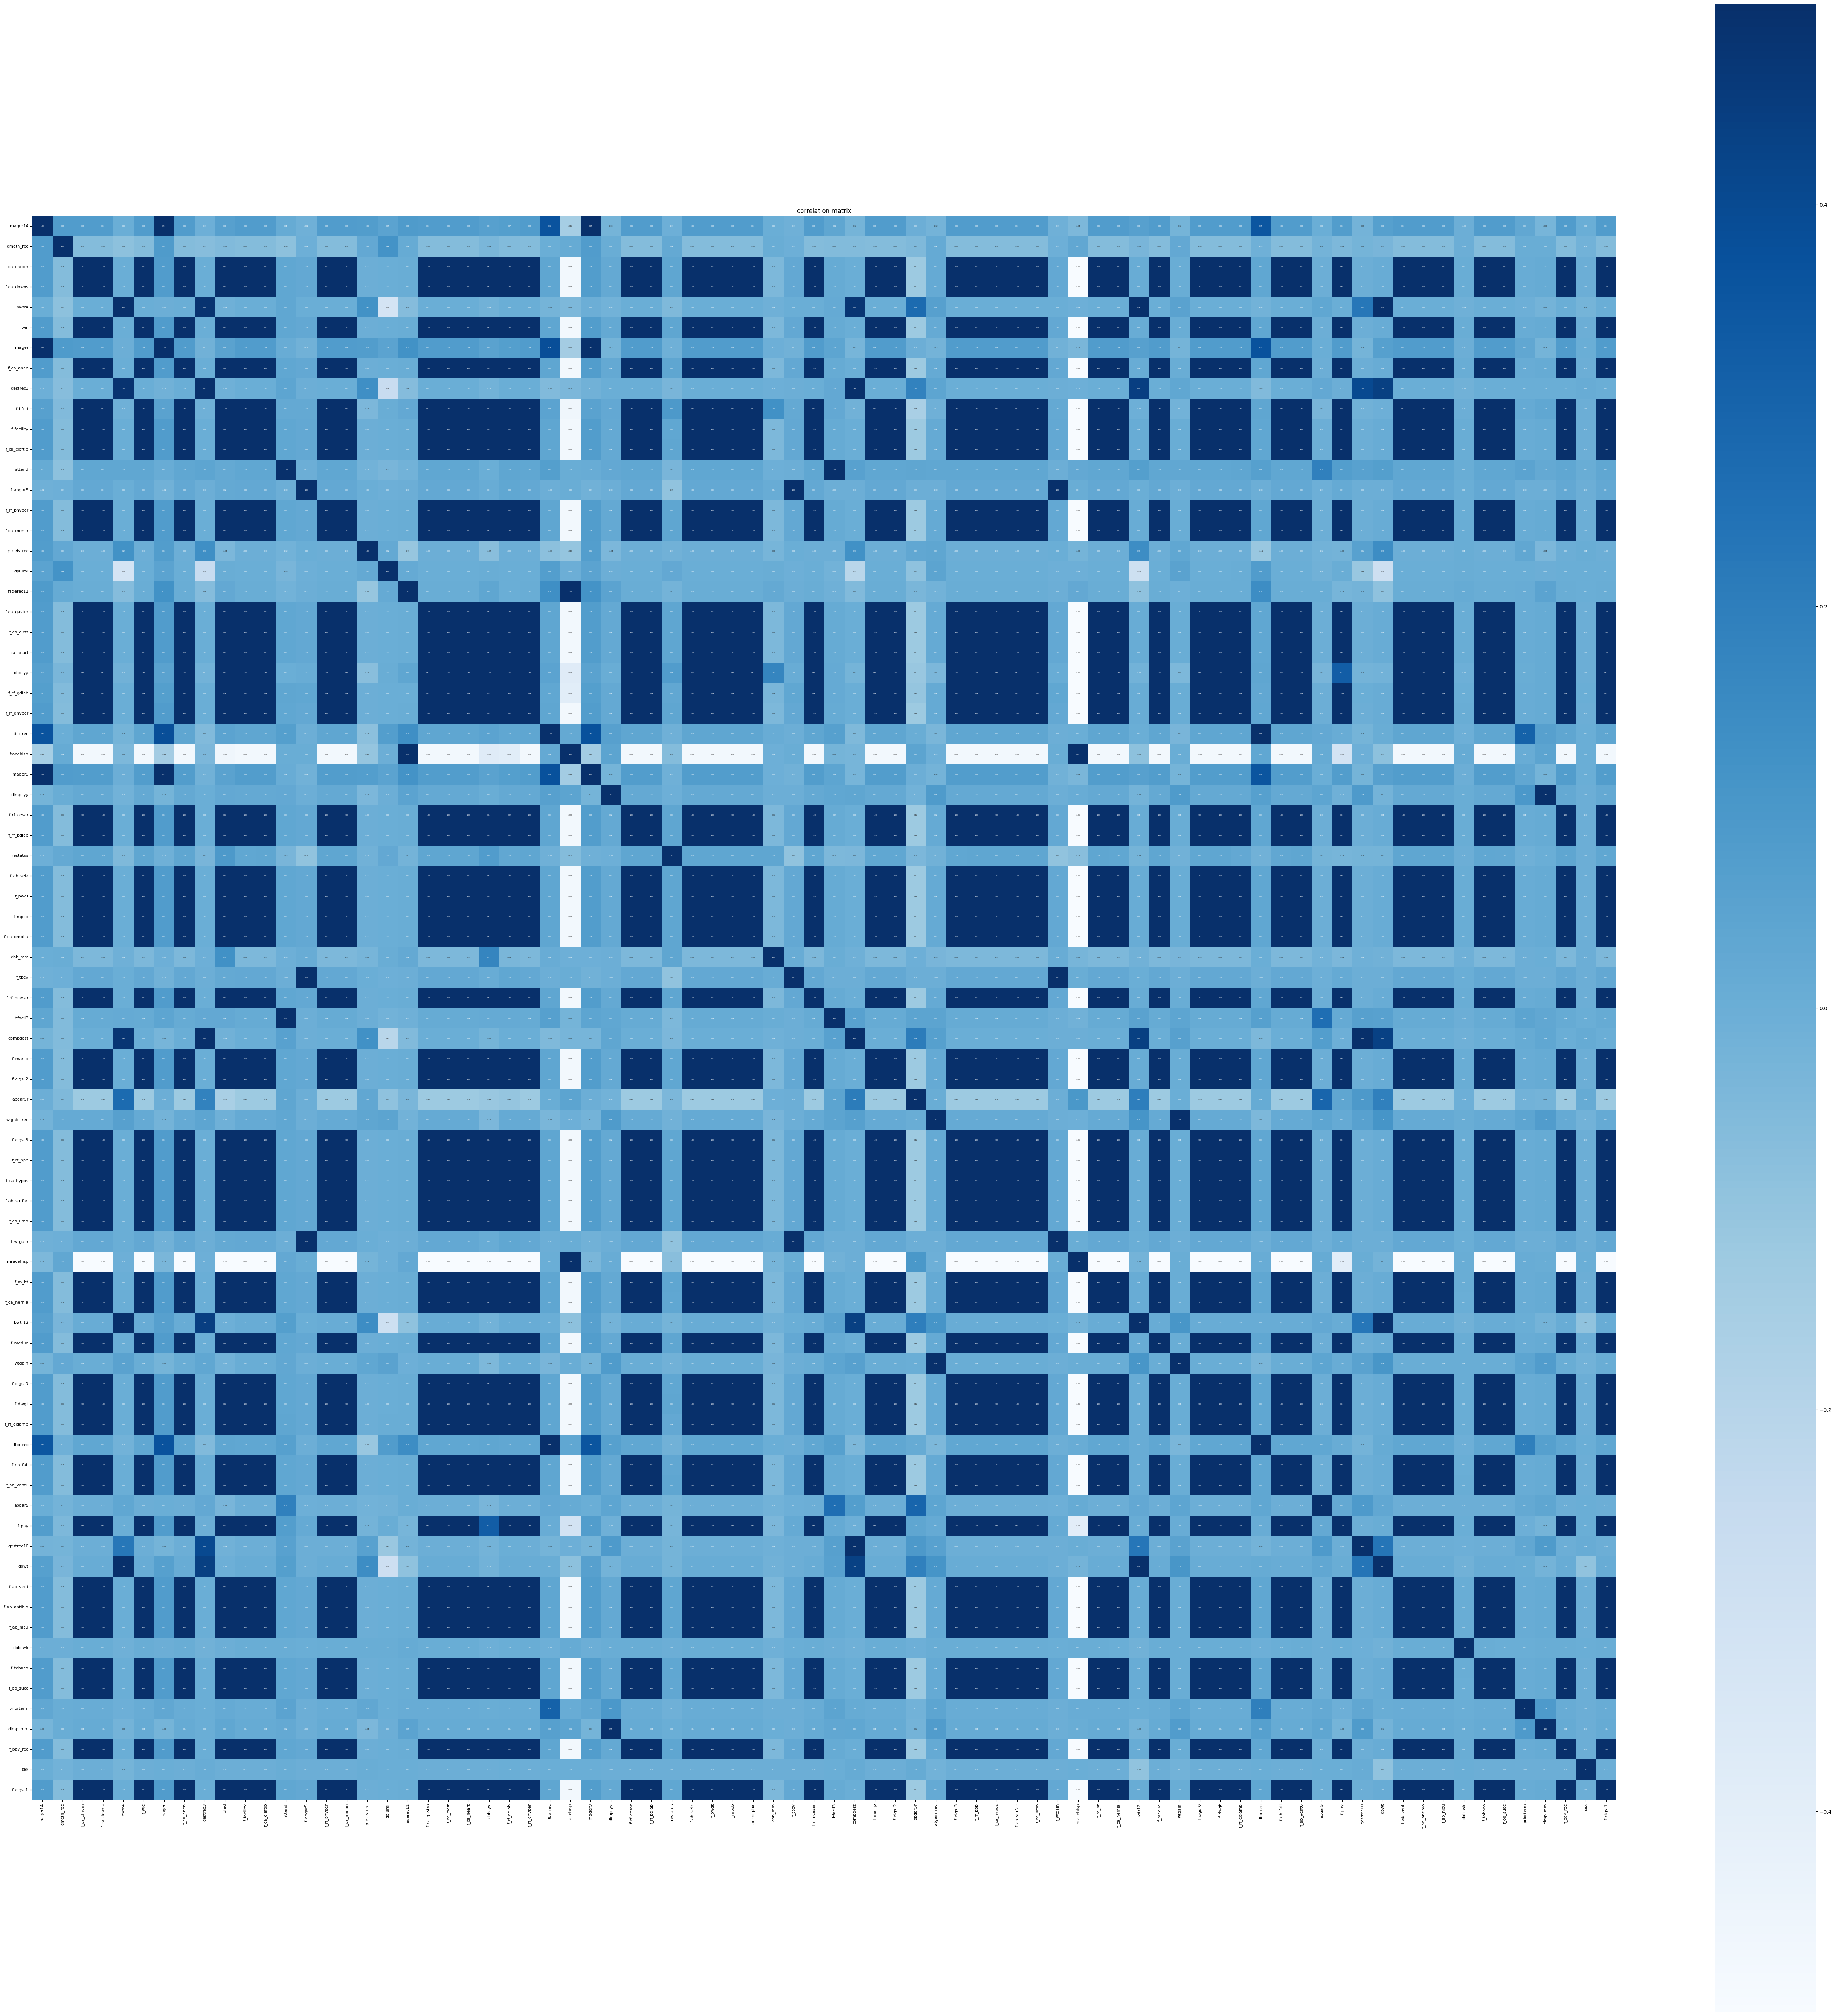

In [45]:
fig, ax = plt.subplots(figsize=(55, 55))

hm = sns.heatmap(corr_df, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr_df.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_df.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_df.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_mat.png", dpi=500)

C:\Users\User\AppData\Local\Temp\ipykernel_9696\4288357140.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_c['dbwt'])


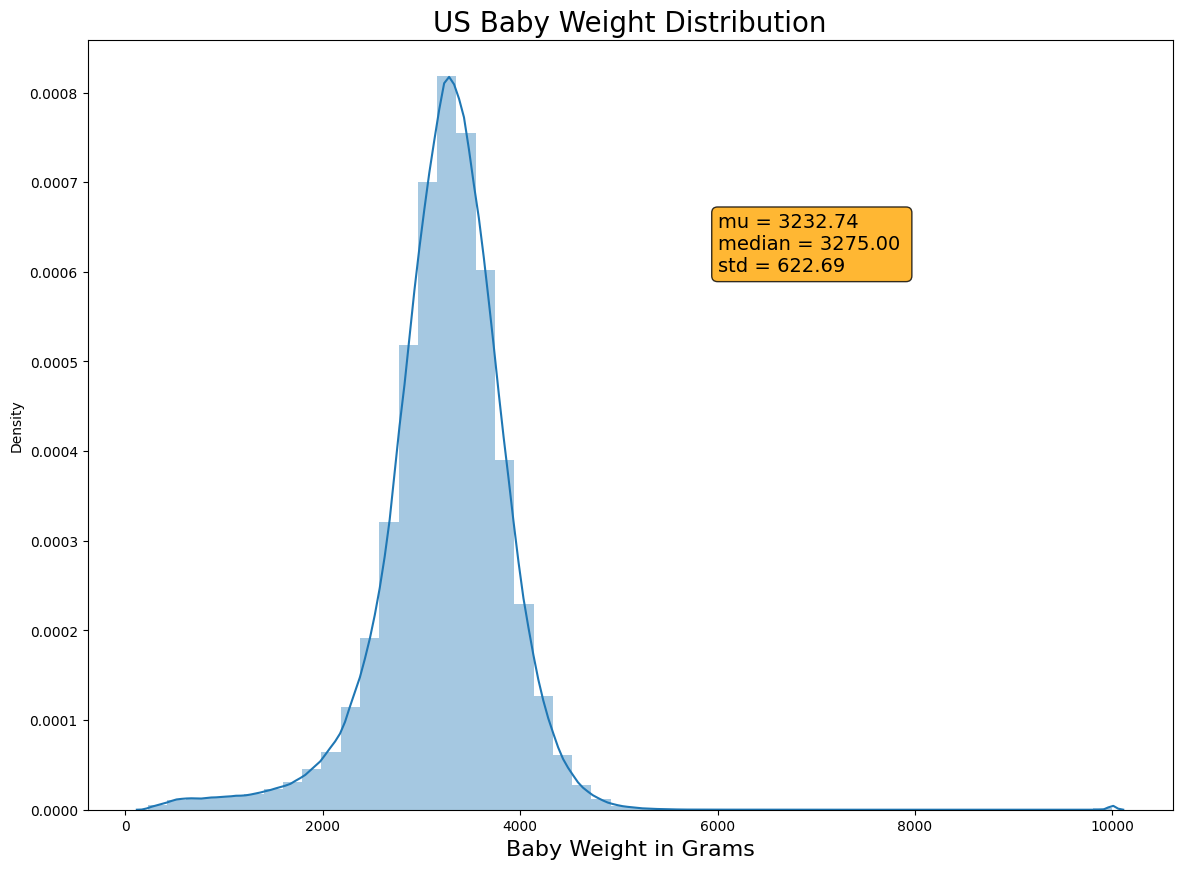

In [46]:
plt.figure(figsize=(14,10))
g = sns.distplot(df_c['dbwt'])
g.set_xlabel('Baby Weight in Grams', fontsize=16)
g.set_title('US Baby Weight Distribution', fontsize=20)
mu = df_c['dbwt'].mean()
median = df_c['dbwt'].median()
std = df_c['dbwt'].std()

textstr = 'mu = {:.2f} \nmedian = {:.2f} \nstd = {:.2f}'.format(mu, median, std)

props = dict(boxstyle='round', facecolor='orange', alpha = 0.8)
g.text(6000, 0.0006, textstr, fontsize=14, bbox=props)
plt.savefig('WeightDistribution', bbox_inches = 'tight', pad_inches=0.5);

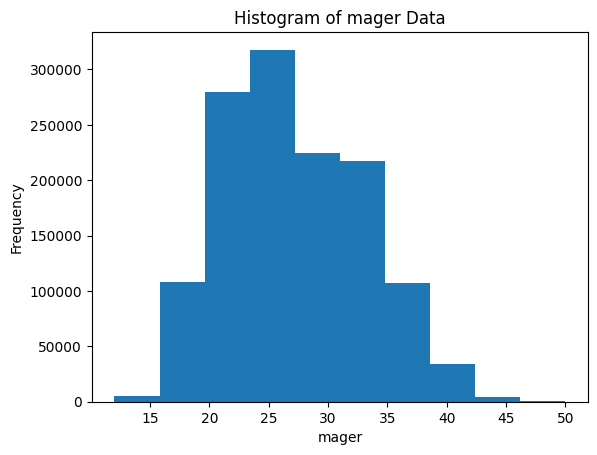

In [47]:
import matplotlib.pyplot as plt

# assuming data is a pandas dataframe and "sex" is a column in the dataframe
# extract the column and store it in a variable
sex_data = df_c["mager"]

# use matplotlib to create a histogram of the data
plt.hist(sex_data)

# set title and labels for the plot
plt.title("Histogram of mager Data")
plt.xlabel("mager")
plt.ylabel("Frequency")

# display the plot
plt.show()


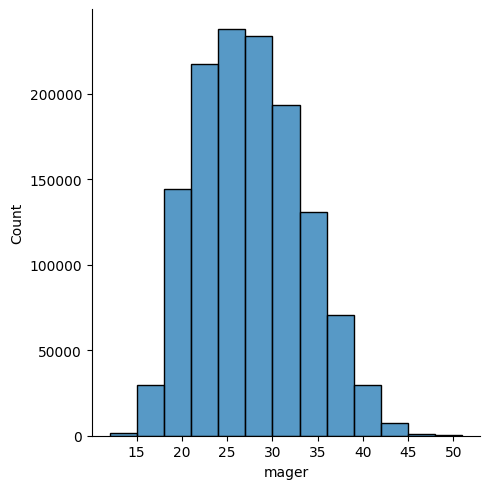

In [48]:

sns.displot(df_c['mager'],binwidth=3,)


In [ ]:
plt.figure(figsize=(14,10))
sns.distplot(df_c['bmi'])

In [52]:
df_c.to_csv('data_concat_after_cleaning_030423.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_9696\1826430977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_c[df_c['sex'].eq(0)]['dbwt'], label = 'Female')
C:\Users\User\AppData\Local\Temp\ipykernel_9696\1826430977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_c[df_c['sex'].eq(1)]

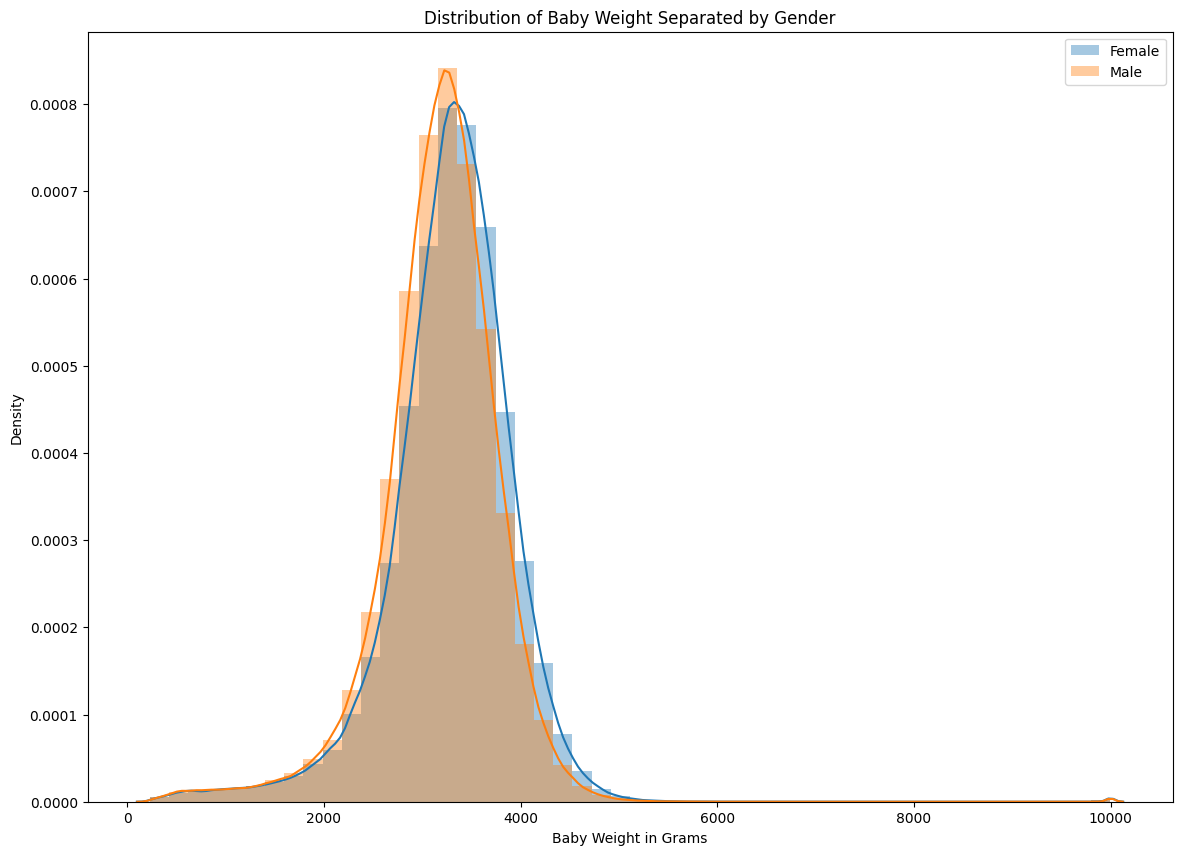

In [53]:
plt.figure(figsize=(14,10))
sns.distplot(df_c[df_c['sex'].eq(0)]['dbwt'], label = 'Female')
sns.distplot(df_c[df_c['sex'].eq(1)]['dbwt'], label = 'Male')
plt.title('Distribution of Baby Weight Separated by Gender')
plt.xlabel('Baby Weight in Grams')
plt.legend();

In [ ]:
plt.figure(figsize=(14,10))
sns.distplot(df_c[df_c['cig_rec'].eq(0)]['dbwt'], label = 'non smoker')
sns.distplot(df_c[df_c['cig_rec'].eq(1)]['dbwt'], label = 'smoker')
plt.title('Distribution of Baby Weight Separated by smoker/non smoker')
plt.xlabel('Baby Weight in Grams')
plt.legend();

In [ ]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['apgar5'].le(5)]['dbwt'], label = 'Apgar score > 5')
sns.distplot(data[data['apgar5'].gt(5)]['dbwt'], label = 'Apgar score > 5')
plt.title('Distribution of Baby Weight Separated by Apgar score value')
plt.xlabel('Baby Weight in Grams')
plt.legend();